In [54]:
from glob import glob

paths_json = glob('/home/yuki/Work/Tohoku/Datasets/CMMD/*/*.Json')
paths_json = sorted(paths_json)

(2294, 2294)


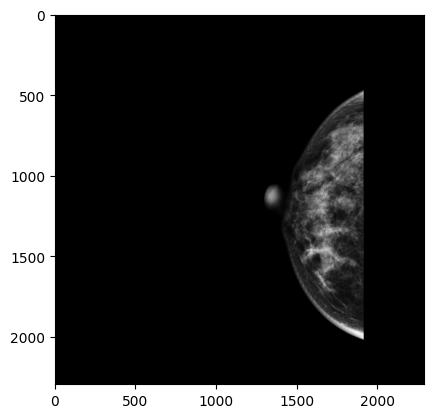

In [52]:
import pydicom
from PIL import Image
import matplotlib.pyplot as plt

path_dcm = '/home/yuki/Work/Tohoku/Datasets/CMMD/D1-0903/DicomFile.dcm'

def show_dcm(path_dcm):
    dataset = pydicom.filereader.dcmread(path_dcm)
    img = dataset.pixel_array
    print(img.shape)

    pil_img = Image.fromarray(img)
    pil_img = pil_img.convert('L')
    plt.imshow(pil_img, cmap = 'gray')
    plt.show()
    plt.close()
  
show_dcm(path_dcm)

In [56]:
import os
from pathlib import Path
from tqdm import tqdm

for j in tqdm(paths_json):
    fname = Path(j).parent.stem
    path_dcm = os.path.join('/home/yuki/Work/Tohoku/Datasets/CMMD', fname, 'DicomFile.dcm')
    
    dataset = pydicom.filereader.dcmread(path_dcm)
    img = dataset.pixel_array

    pil_img = Image.fromarray(img)
    pil_img = pil_img.convert('L')
    
    savename = os.path.join(Path(path_dcm).parent, f'{Path(path_dcm).parent.stem}.png')
    pil_img.save(savename)
    
    # show_dcm(path_dcm)

100%|██████████| 1195/1195 [02:03<00:00,  9.71it/s]


In [98]:
import json

paths_json_have_label = []
for j in paths_json:
    with open(j) as f:
        txt = f.read()
    if len(txt) > 0:
        with open(j) as f:
            file = json.load(f)
        stem = Path(j).parent.stem
        path_json = os.path.join(stem, 'AnnotationFile.Json')
        path_dcm = os.path.join(stem, 'DicomFile.dcm')
        # print(path_json, path_dcm)
        paths_json_have_label.append(path_json)

In [99]:
len(paths_json_have_label)

395

In [69]:
file[1]['label']

'mass'

In [58]:
import numpy as np

px, py = [], []
for p in file[0]['cgPoints']:
    px.append(p['x'])
    py.append(p['y'])
    
[np.min(px), np.min(py), np.max(px), np.max(py)]

[1589.6945510364724, 1356.922900007618, 1686.801742876731, 1532.5726734833797]

## train, valに分ける

In [103]:
import numpy as np
from sklearn.model_selection import train_test_split

idx_all = np.arange(len(paths_json_have_label))

idx_train, idx_val = train_test_split(idx_all, test_size=0.2, random_state=42)


In [110]:
import shutil

DIR = "/home/yuki/Work/Tohoku/Datasets/CMMD"
dir_train = os.path.join(DIR, 'train')
dir_val = os.path.join(DIR, 'val')
os.makedirs(dir_train, exist_ok=True)
os.makedirs(dir_val, exist_ok=True)

for idx in tqdm(idx_train):
    name = Path(paths_json_have_label[idx]).parent
    path_from = os.path.join(DIR, name)
    path_to = os.path.join(dir_train, name)
    shutil.copytree(path_from, path_to)
    
for idx in tqdm(idx_val):
    name = Path(paths_json_have_label[idx]).parent
    path_from = os.path.join(DIR, name)
    path_to = os.path.join(dir_val, name)
    shutil.copytree(path_from, path_to)

100%|██████████| 79/79 [00:00<00:00, 94.43it/s] 
